In [ ]:
import pandas as pd

from timeseries import TimeSeries

In [ ]:
df = pd.read_spss("./data/gnp.sav")


def parse_date(date: str) -> str:
    trim = {1: "01", 2: "04", 3: "07", 4: "10"}
    q, y = date.split()
    num = int(q[1])
    return f"01-{trim[num]}-{y}"


df["Tiempo"] = df["date_"].apply(parse_date)
print(df.head())

        indice   year_  quarter_    date_      Tiempo
0  1056.503342  1947.0       1.0  Q1 1947  01-01-1947
1  1063.201587  1947.0       2.0  Q2 1947  01-04-1947
2  1067.100035  1947.0       3.0  Q3 1947  01-07-1947
3  1080.003974  1947.0       4.0  Q4 1947  01-10-1947
4  1086.796873  1948.0       1.0  Q1 1948  01-01-1948


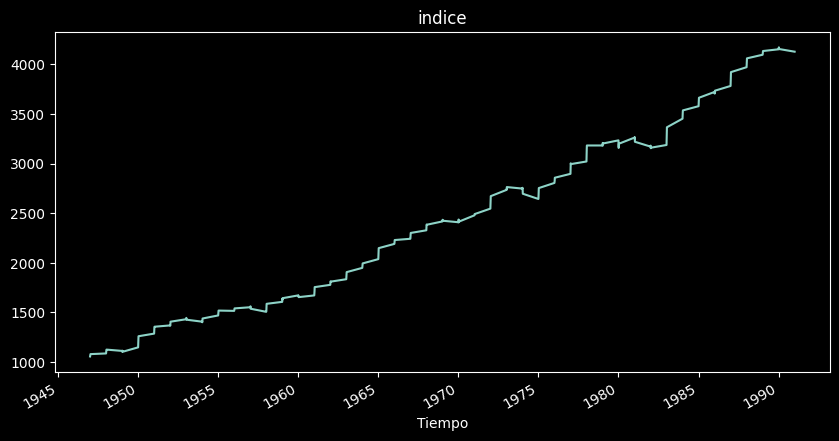

In [ ]:
gnp = TimeSeries.from_dataframe(df, "indice", "Tiempo")
gnp.plot()

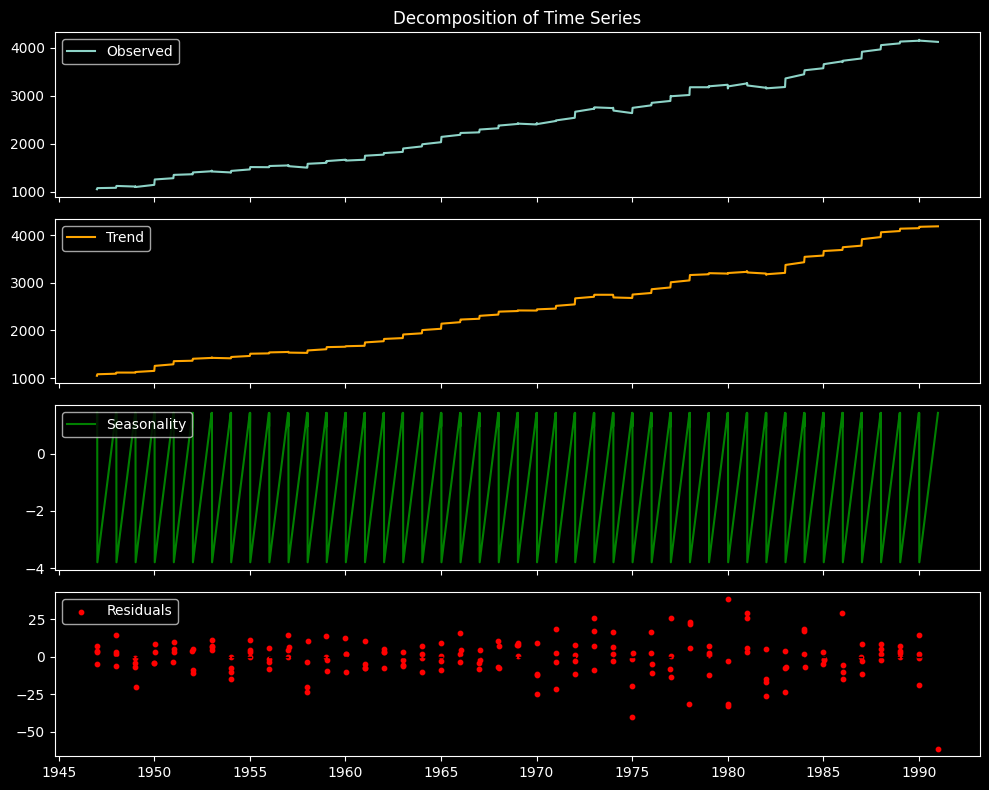

In [ ]:
decomp = gnp.decompose(period=4)
decomp.plot()

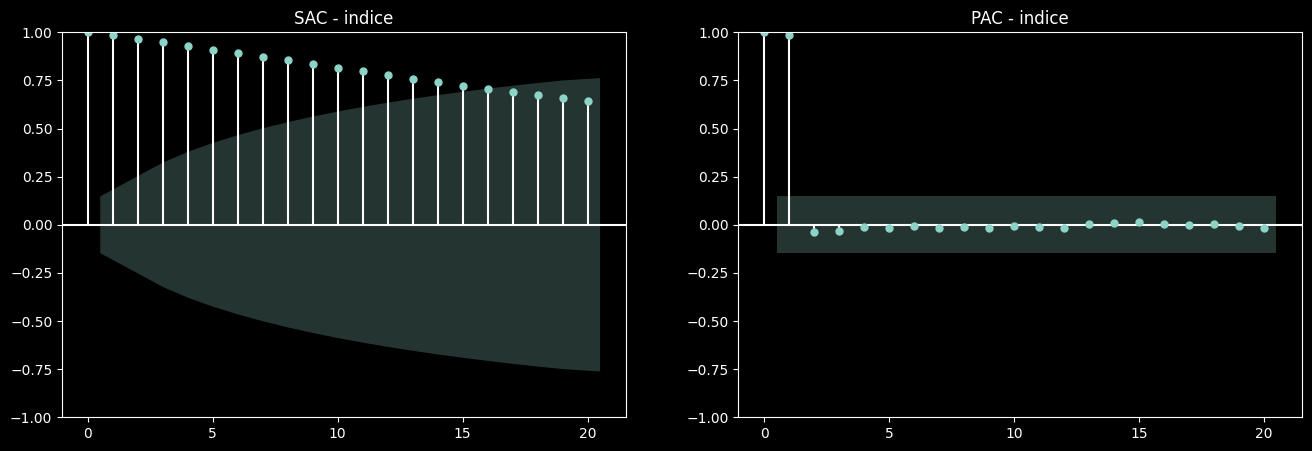

In [ ]:
gnp.plot_correlograms()

Vemos que la gráfica de FAS decae muy lentamente, esto se corresponde con la tendencia que observamos en la gráfica.

En la gráfica de FAP vemos una correlación casi total en el lag 1 y después barras no significativas, parece un camino aleatorio.

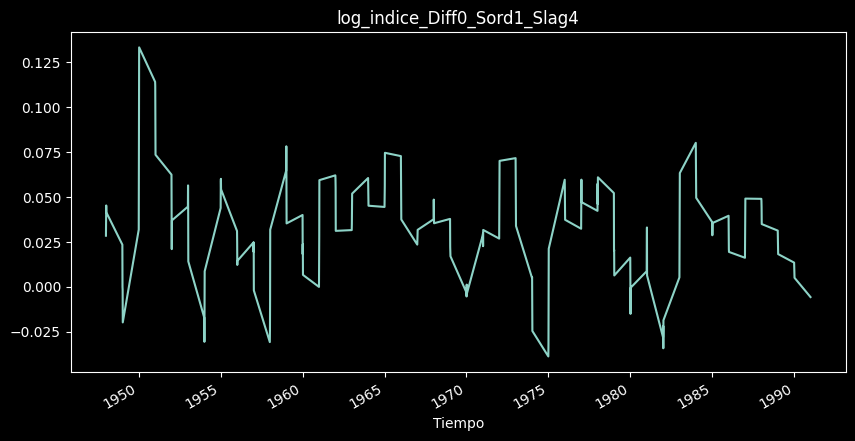

In [ ]:
gnp_est = gnp.log().diff(order=0, seasonal_lag=4, seasonal_order=1)
gnp_est.plot()

Al aplicar una transformación logarítmica y luego diferenciar estacionalmente una vez hemos eliminazo por completo la tencendia, por lo que es casi seguro que nuestro parámetro de diferenciación sea d = 1.

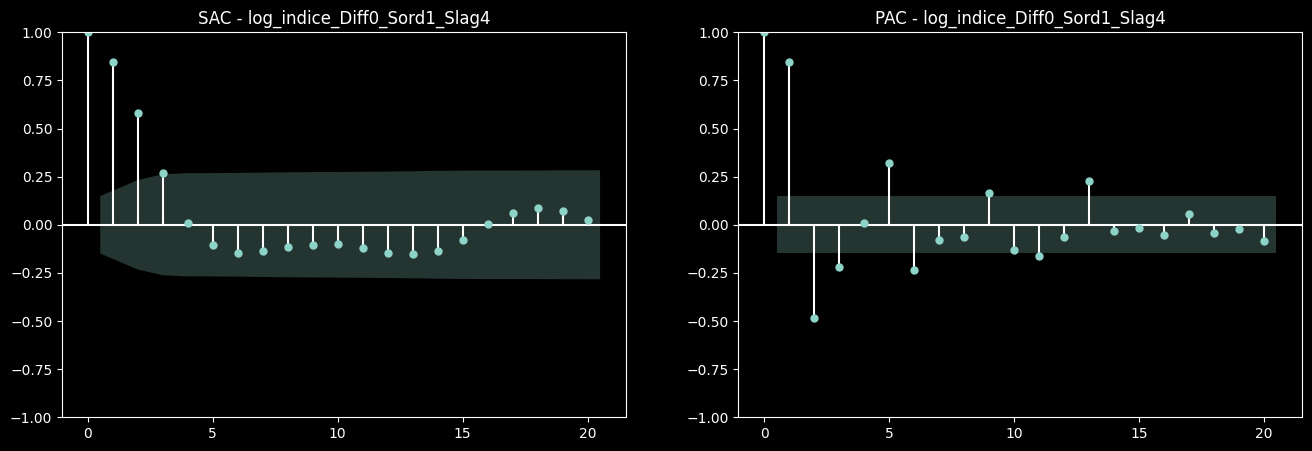

In [ ]:
gnp_est.plot_correlograms()

En el nuevo gráfico FAS vemos un decaimiento más rápido, aunque no abrupto, con barras significativas en los lags 1, 2 y más o menos 3. Este decaimiento nos sugiere q = 0, es decir, sin componente MA.

En la gráfica FAP vemos barras significativas en los primeros 3 lags. Esto nos sugiere un modelo AR(3).